# PRACTICALIZING SIMPLE LOGISTICS REGRESSION WITH A LOAN DATASET

The loan prediction dataset contains three columns. column names are: Income, Loan Amount and Default. Income and Loan Amount are numeric variables, while Default is categorical variable which can be either( yes or no) answer. Income and Loan Amount are independent variable the predictor while Default column is the dependent variable. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load your dataset (replace 'dataset.csv' with your dataset file)
loan = pd.read_csv("loan.csv")
loan.head()

,Income,Loan Amount,Default
0,30,8,No
1,22,10,No
2,33,12,No
3,28,20,No
4,23,32,No


In [3]:
# View the data types and check for null values
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Income       30 non-null     int64 
 1   Loan Amount  30 non-null     int64 
 2   Default      30 non-null     object
dtypes: int64(2), object(1)
memory usage: 848.0+ bytes


The Dataset has no null value

In [4]:
# Summary statistics
loan.describe()

,Income,Loan Amount
count,30.000000,30.000000
mean,20.966667,54.233333
std,6.195011,28.231412
min,12.000000,8.000000
25%,16.250000,32.000000
50%,20.500000,54.500000
75%,24.750000,71.750000
max,34.000000,110.000000


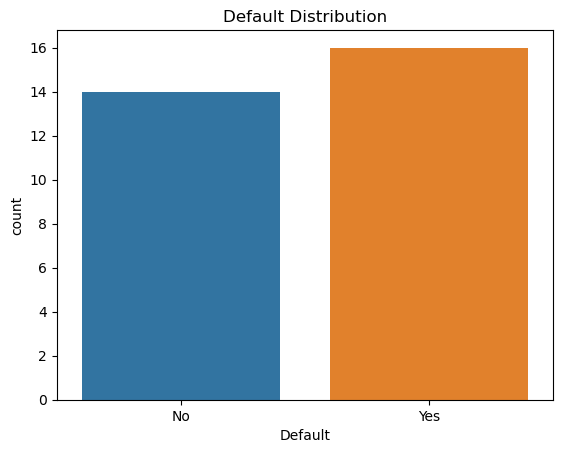

In [6]:
# Distribution of Default Columns
sns.countplot(x='Default', data=loan)
plt.title('Default Distribution')
plt.show()

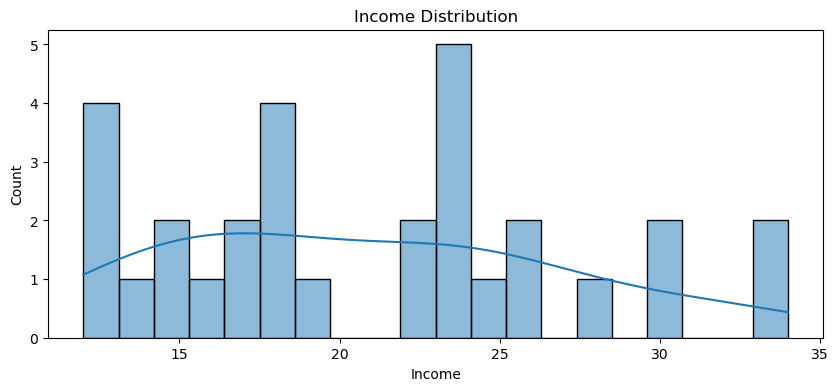

In [9]:
# Distribution of Income
plt.figure(figsize=(10, 4))
sns.histplot(loan['Income'], bins=20, kde=True)
plt.title('Income Distribution')
plt.show()

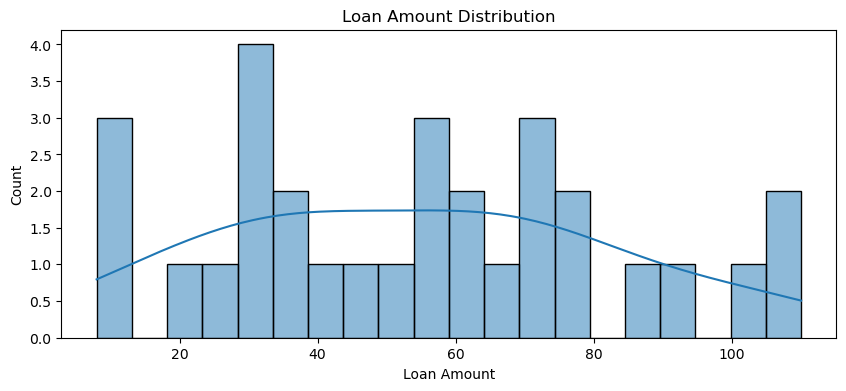

In [10]:
# Distribution of Loan Amount
plt.figure(figsize=(10, 4))
sns.histplot(loan['Loan Amount'], bins=20, kde=True)
plt.title('Loan Amount Distribution')
plt.show()

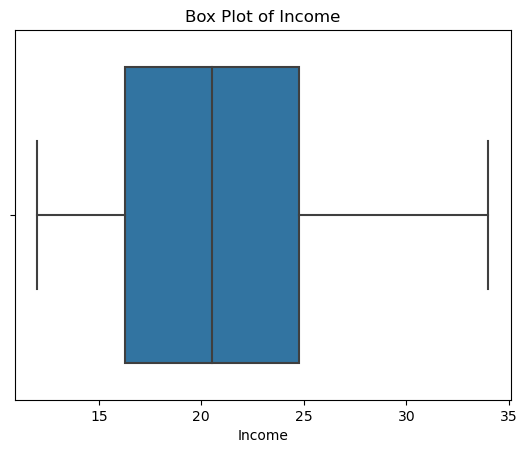

In [24]:
# Box plot for Income
sns.boxplot(x=loan['Income'])
plt.title('Box Plot of Income')
plt.show()

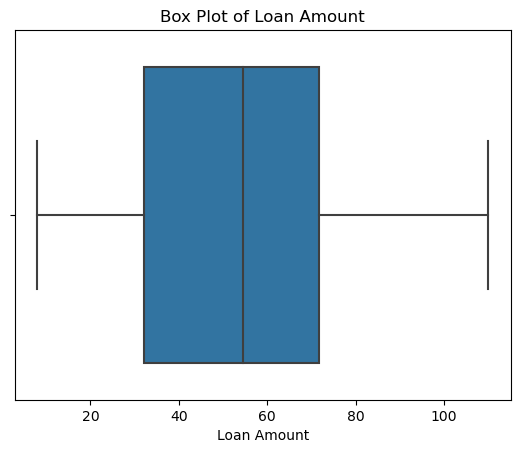

In [25]:
# Box plot for Loan Amount
sns.boxplot(x=loan['Loan Amount'])
plt.title('Box Plot of Loan Amount')
plt.show()

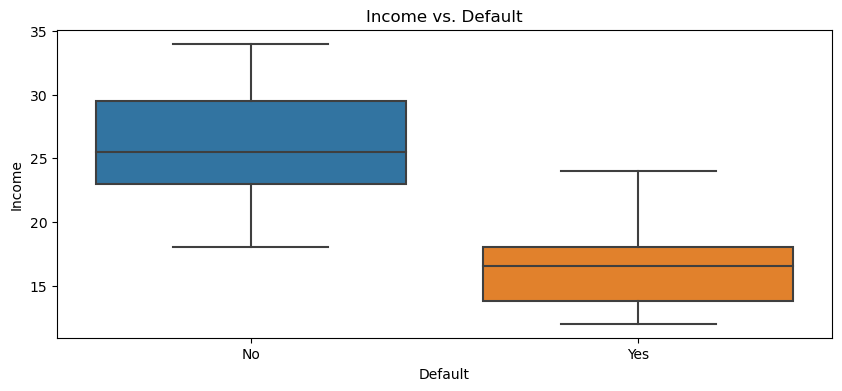

In [11]:
# Box plots of Income vs. Default
plt.figure(figsize=(10, 4))
sns.boxplot(x='Default', y='Income', data=loan)
plt.title('Income vs. Default')
plt.show()

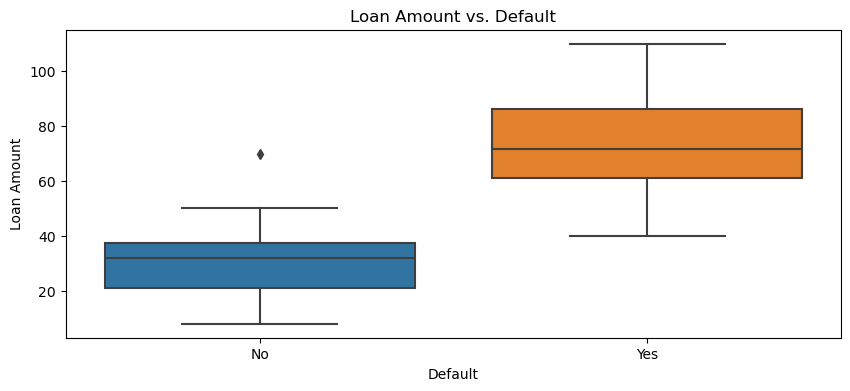

In [12]:
# Box plots of Loan Amount vs. Default
plt.figure(figsize=(10, 4))
sns.boxplot(x='Default', y='Loan Amount', data=loan)
plt.title('Loan Amount vs. Default')
plt.show()

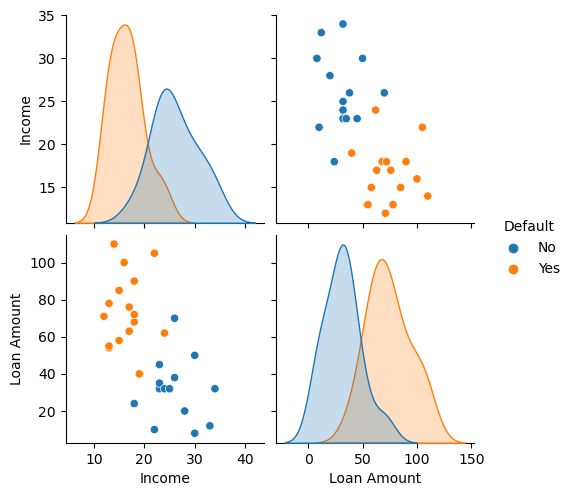

In [7]:
# Pairplot for numeric variables
sns.pairplot(loan, hue='Default')
plt.show()

C:\Users\EVERISTUS\AppData\Local\Temp\ipykernel_16940\3631274032.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = loan.corr()


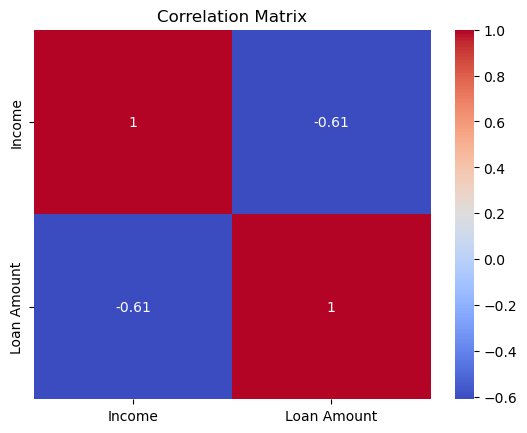

In [8]:
# Correlation matrix
correlation_matrix = loan.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [15]:
# Convert 'Default' column to binary labels (0 for 'No' and 1 for 'Yes')
loan['Default'] = loan['Default'].map({'No': 0, 'Yes': 1})

In [16]:
# Separate the features (X) and the target variable (y)
X = loan[['Income', 'Loan Amount']]
y = loan['Default']

In [17]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Standardize the features (scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Create and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [20]:
# Make predictions
y_pred = model.predict(X_test)

In [21]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.67


In [22]:
# Classification report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.75      0.75      0.75         4

    accuracy                           0.67         6
   macro avg       0.62      0.62      0.62         6
weighted avg       0.67      0.67      0.67         6



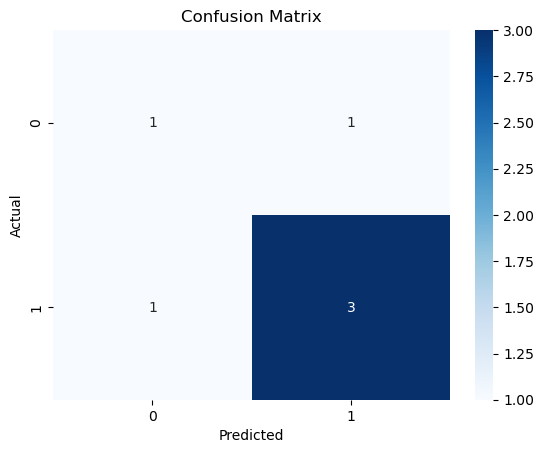

In [23]:
# Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()